<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

## San Francisco Data

---

[San Francisco provides a wealth of data on the city to the public.](https://data.sfgov.org/) 

Project 3 is all about modelling exploring this data and modeling interesting relationships with regression. 


---

## Notes on the data

We have gone through the above website and pulled out a variety of different datasets that we think are particularly interesting. Some of the datasets are from external sources as well, but all are related to San Francisco. A high level overview of data folders is provided after the project requirements section.

** Feel free to include any other datasets from the San Francisco data if you think there is relevance or if it could be useful for your analysis.**


**The uncompressed data is a large filesize.** Even the compressed data is pretty large. The data is compressed into a .7z format which has one of the smallest filesizes available. You will likely need a 3rd party app to extract it. 

### Recommended Utilities for .7z
- For OSX [Keka](http://www.kekaosx.com/en/) or [The Unarchiver](http://wakaba.c3.cx/s/apps/unarchiver.html). 
- For Windows [7-zip](http://www.7-zip.org/) is the standard. 
- For Linux try the `p7zip` utility.  `sudo apt-get install p7zip`.

---

## Project requirements

**You will be performing 4 different sections of analysis on the San Francisco data.**

**Models must be regression. This means that your target variable needs to be numeric/continuous**

Do not perform classification models – this will be the topic of week 4.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 1. Use the San Francisco assessor dataset and perform EDA

---

1. Explain what the data is. This may include multiple csv files. Some of this data has hard to understand codes representing the variables. Nearly all data is pulled from https://data.sfgov.org/ so this is a very good resource for determining what the data is.
- Clean the data.
- Develop and state clearly a hypothesis about the data that you would want to test.(This is totally upto you)
- Create some initial visualizations on the portions of the data relevant to your hypothesis.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
assessor_value = pd.read_csv('/Users/yangliu/Desktop/dsi-sf-7-materials-yangliu/datasets/sf_assessor_value/assessor_value_cleaned.csv')
#assessor_data_2007_2008 = pd.read_csv('/Users/yangliu/Desktop/dsi-sf-7-materials-yangliu/datasets/san_francisco/san_francisco/assessor_office/assessor_data_2007_2008.csv')
#assessor_data_2008_2009 = pd.read_csv('/Users/yangliu/Desktop/dsi-sf-7-materials-yangliu/datasets/san_francisco/san_francisco/assessor_office/assessor_data_2008_2009.csv')

In [9]:
assessor_value.head()

,baths,beds,lot_depth,basement_area,front_ft,owner_pct,rooms,property_class,neighborhood,tax_rate,volume,sqft,stories,year_recorded,year_built,zone,value
0,2,2,0.0,0.0,0.0,1.00000,5,Z,08E,1000.0,1,1419,0,2007,1907,RH3,1002840.0
1,2,2,0.0,0.0,0.0,1.00000,7,Z,08E,1000.0,1,1773,0,2007,1907,RH3,1433430.0
2,2,2,0.0,0.0,0.0,1.00000,5,Z,08E,1000.0,1,1242,0,2007,1995,C2,485599.0
3,1,0,0.0,0.0,0.0,0.33333,6,D,08E,1000.0,1,1820,1,2007,1927,RH3,120826.0
4,1,0,0.0,0.0,0.0,1.00000,4,D,08E,1000.0,1,1020,1,2007,1926,RH3,988380.0


In [65]:
assessor_value.info()
#There is no null value in this dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754147 entries, 0 to 754146
Data columns (total 18 columns):
baths             754147 non-null int64
beds              754147 non-null int64
lot_depth         754147 non-null float64
basement_area     754147 non-null float64
front_ft          754147 non-null float64
owner_pct         754147 non-null float64
rooms             754147 non-null int64
property_class    754147 non-null object
neighborhood      754147 non-null object
tax_rate          754147 non-null float64
volume            754147 non-null int64
sqft              754147 non-null int64
stories           754147 non-null int64
year_recorded     754147 non-null int64
year_built        754147 non-null int64
zone              754147 non-null object
value             754147 non-null float64
enc_class         754147 non-null int64
dtypes: float64(6), int64(9), object(3)
memory usage: 103.6+ MB


In [ ]:
#the data is provided by the Office of the Assessor-Recorder. It includes information about location of property,
#value of property, and specific property characteristics. 

In [11]:
#assessor_value.property_class.value_counts()

D      627017
Z      120853
LZ       3402
ZBM      1479
TH        929
DBM       467
Name: property_class, dtype: int64

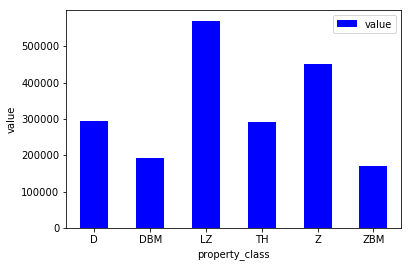

In [17]:
"""
class_pivot = assessor_value.pivot_table(index='property_class',
                                    values='value', aggfunc=np.median)
class_pivot.plot(kind='bar', color='blue')
plt.xlabel('property_class')
plt.ylabel('value')
plt.xticks(rotation=0)
plt.show()

In [60]:
#change all object variables to dummy variables
"""
assessor_value_cat = assessor_value.select_dtypes(include=['object'])
assessor_value_dummies = pd.get_dummies(assessor_value_cat)

assessor_df = pd.concat([assessor_value, assessor_value_dummies], axis=1)

In [ ]:
#My hypothesis is value and sqft are positively corelated, year_built and value are positively corelated

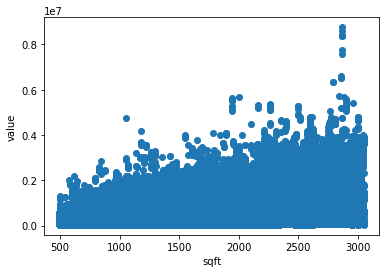

In [62]:
plt.scatter(x=assessor_df['sqft'], y=assessor_df['value'])
plt.ylabel('value')
plt.xlabel('sqft')
plt.show()
#As we can see from the plot, there exits relationship between sqft and value

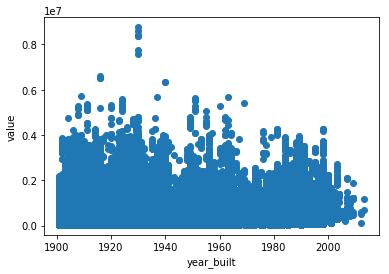

In [68]:
plt.scatter(x=assessor_df['year_built'], y=assessor_df['value'])
plt.ylabel('value')
plt.xlabel('year_built')
plt.show()
#As we can see from the plot, we cannot tell if there is relationship between these two variables.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2. Construct and evaluate a linear regression model on the data

---

1. State the variables that are predictors in your linear regression and the target variable.
- Investigate and remove any outliers or other problems in your data. _This is a subjective process._
- Construct a linear regression model.
- Evaluate the model. How does the $R^2$ of the overall model compare to cross-validated $R^2$. What do the differences in $R^2$ mean?
  - Use test / train split
  - Use K-Folds
  - Compare and explain your results with both
- Visualize the evaluation metrics of your analysis in clear charts.
- Summarize your results in the context of your hypothesis. Frame this as if you are presenting to non-technical readers.


In [23]:
target = assessor_df.value

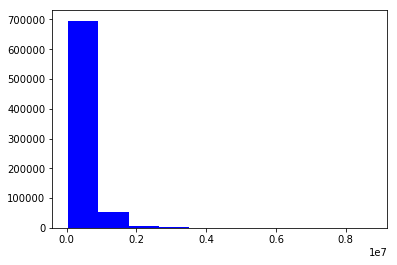

In [24]:
plt.hist(target, color='blue')
plt.show()

In [25]:
#value column is highly skewed. Take a log to normailze
y = np.log(target)

In [70]:
X = assessor_value[['year_built','sqft']]

In [71]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 754147 entries, 0 to 754146
Data columns (total 2 columns):
year_built    754147 non-null int64
sqft          754147 non-null int64
dtypes: int64(2)
memory usage: 11.5 MB


In [72]:
from sklearn import linear_model
lr = linear_model.LinearRegression()

In [75]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.20)
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
print ('R^2 is:', model.score(X_test, y_test))


"""
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=2, shuffle = True)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    lr.fit(X_train, y_train)
    print lr.score(X_test, y_test)
"""

('R^2 is:', 0.050187223524470359)


'\nfrom sklearn.model_selection import StratifiedKFold\nskf = StratifiedKFold(n_splits=2, shuffle = True)\n\nfor train_index, test_index in skf.split(X, y):\n    X_train, X_test = X[train_index], X[test_index]\n    y_train, y_test = y[train_index], y[test_index]\n\n    lr.fit(X_train, y_train)\n    print lr.score(X_test, y_test)\n'

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 2.2 Explain $R^2$ vs. mean squared error (MSE)

---

1. If you have negative $R^2$ values in cross-validation, what does this mean? 
2. Why can $R^2$ only be negative when the model is tested on new data?

In [ ]:
"""
R2 is a measure of how much of the variance in y is explained by x.

1.If you have negative  R2R2  values in cross-validation, what does this mean?
It means the model is not accurate, need more variables.

2.Why can  R2  only be negative when the model is tested on new data?
Because I only used two variables in my model, is not accuate to predict

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3. Combine Crime and Fire incidents datasets from the  San Francisco data. Build a Linear regression model to predict number of fire incidents. What are the most significant predictors?

### Evaluate the model with regularized regression.

---

**I recommend having many predictors to see benefits from regularization methods, but it's up to you.**


- Like in part 1, you should state a hypothesis and perform data cleaning and EDA _only_ on the relevant portions of your data. Don't waste time!
- Construct and evaluate different models with cross-validated $R^2$. Compare LinearRegression, Lasso, Ridge, and ElasticNet. 
- Report on which model is best after performing regularization, and why that might be the case (hint: does your data have multicollinearity? Irrelevant variables? Both?)
- Plot visuals that compare the performance of the four models.


In [77]:
sf_crime = pd.read_csv('/Users/yangliu/Desktop/dsi-sf-7-materials-yangliu/datasets/san_francisco/san_francisco/sf_crime/sfpd_incidents_from2003.csv')

In [78]:
sf_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945294 entries, 0 to 1945293
Data columns (total 13 columns):
IncidntNum    int64
Category      object
Descript      object
DayOfWeek     object
Date          object
Time          object
PdDistrict    object
Resolution    object
Address       object
X             float64
Y             float64
Location      object
PdId          int64
dtypes: float64(2), int64(2), object(9)
memory usage: 192.9+ MB


In [79]:
sf_crime.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,110914565,WARRANTS,WARRANT ARREST,Friday,05/29/2015,16:42,SOUTHERN,"ARREST, BOOKED",BRYANT ST / 8TH ST,-122.406971,37.772527,"(37.7725273607571, -122.406970988225)",11091456563010
1,11351210,MISSING PERSON,FOUND PERSON,Tuesday,06/14/2016,08:55,BAYVIEW,NONE,1200 Block of 3RD ST,-122.389518,37.772468,"(37.7724682400061, -122.389517648036)",1135121075000
2,120789988,MISSING PERSON,FOUND PERSON,Monday,05/16/2016,00:41,INGLESIDE,NONE,WOOLSEY ST / UNIVERSITY ST,-122.412470,37.722659,"(37.7226585129212, -122.412469643631)",12078998875000
3,140608681,ROBBERY,"ROBBERY, BODILY FORCE",Thursday,06/16/2016,21:00,SOUTHERN,"ARREST, BOOKED",0 Block of UNITEDNATIONS PZ,-122.414318,37.779944,"(37.7799444052046, -122.414317857881)",14060868103074
4,140608681,OTHER OFFENSES,VIOLATION OF MUNICIPAL CODE,Thursday,06/16/2016,21:00,SOUTHERN,"ARREST, BOOKED",0 Block of UNITEDNATIONS PZ,-122.414318,37.779944,"(37.7799444052046, -122.414317857881)",14060868130200


In [80]:
sf_crime.corr()

,IncidntNum,X,Y,PdId
IncidntNum,1.00000,-0.006570,-0.008790,1.00000
X,-0.00657,1.000000,0.550614,-0.00657
Y,-0.00879,0.550614,1.000000,-0.00879
PdId,1.00000,-0.006570,-0.008790,1.00000


In [83]:
sf_crime.Descript.value_counts()

GRAND THEFT FROM LOCKED AUTO                              141417
LOST PROPERTY                                              69443
BATTERY                                                    59903
STOLEN AUTOMOBILE                                          59325
DRIVERS LICENSE, SUSPENDED OR REVOKED                      58922
WARRANT ARREST                                             51778
AIDED CASE, MENTAL DISTURBED                               48721
SUSPICIOUS OCCURRENCE                                      47469
PETTY THEFT FROM LOCKED AUTO                               44590
MALICIOUS MISCHIEF, VANDALISM OF VEHICLES                  39376
PETTY THEFT OF PROPERTY                                    37405
MALICIOUS MISCHIEF, VANDALISM                              36293
TRAFFIC VIOLATION                                          34964
THREATS AGAINST LIFE                                       31618
FOUND PROPERTY                                             28128
ENROUTE TO OUTSIDE JURISD

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4. Conduct another analysis using the San Francisco Parks data to predict Park scores

---

1. Combining multiple sources of park data (csv files) is required.
- Perform EDA and cleaning on relevant data.
- Construct and compare different regression models with cross-validation.
- Plot descriptive visuals you think are useful for understanding the data.
- Report on your findings.


In [84]:
park_score = pd.read_csv('/Users/yangliu/Desktop/dsi-sf-7-materials-yangliu/datasets/san_francisco/san_francisco/parks/park_scores.csv')
park_info = pd.read_csv('/Users/yangliu/Desktop/dsi-sf-7-materials-yangliu/datasets/san_francisco/san_francisco/parks/park_info.csv')
park_donations = pd.read_csv('/Users/yangliu/Desktop/dsi-sf-7-materials-yangliu/datasets/san_francisco/san_francisco/parks/park_donations.csv')

In [87]:
park_info.head()

,ParkName,ParkType,ParkServiceArea,PSAManager,email,Number,Zipcode,Acreage,SupDist,ParkID,Location 1,Lat
0,ParkName,ParkType,ParkServiceArea,PSAManager,email,Number,NaN,NaN,NaN,NaN,NaN,NaN
1,10TH AVE/CLEMENT MINI PARK,Mini Park,PSA 1,"Elder, Steve",steven.elder@sfgov.org,(415) 601-6501,94118.0,0.66,1.0,156.0,"351 9th Ave\nSan Francisco, CA\n(37.78184397, ...",NaN
2,15TH AVENUE STEPS,Mini Park,PSA 4,"Sheehy, Chuck",charles.sheehy@sfgov.org,(415) 218-2226,94122.0,0.26,7.0,185.0,"15th Ave b w Kirkham\nSan Francisco, CA\n(37.7...",NaN
3,24TH/YORK MINI PARK,Mini Park,PSA 6,"Field, Adrian",adrian.field@sfgov.org,(415) 717-2872,94110.0,0.12,9.0,51.0,"24th\nSan Francisco, CA\n(37.75306042, -122.40...",NaN
4,29TH/DIAMOND OPEN SPACE,Neighborhood Park or Playground,PSA 5,"O'Brien, Teresa",teresa.o'brien@sfgov.org,(415) 819-2699,94131.0,0.82,8.0,194.0,"Diamond\nSan Francisco, CA\n(37.74360211, -122...",NaN


In [86]:
park_donations.head()

,Close Date,Account Name,Description,Amount,Type
0,07/08/2014 12:00:00 AM,Glen Park Association,To support botanical signs at the Sunnyside Co...,$500.00,Cash
1,07/09/2014 12:00:00 AM,USTA NorCAL,To support HITS tennis programming and provide...,$2050.00,Cash
2,08/21/2014 12:00:00 AM,Walter S. Johnson Foundation,To support grounds maintenance at the Walter S...,$5000.00,Cash
3,09/04/2014 12:00:00 AM,Kaiser Permanente,To support the Golden Gate Park Senior Center ...,$1000.00,Cash
4,09/08/2014 12:00:00 AM,San Francisco Parks Alliance (SFPA),To support landscape improvements to Kezar Tri...,$1732.08,Cash


In [85]:
park_score.head()

,ParkID,PSA,Park,FQ,Score
0,86,PSA4,Carl Larsen Park,FY05Q3,0.795
1,13,PSA4,Junipero Serra Playground,FY05Q3,0.957
2,9,PSA4,Rolph Nicol Playground,FY05Q3,0.864
3,117,PSA2,Alamo Square,FY05Q4,0.857
4,60,PSA6,Jose Coronado Playground,FY05Q4,0.859


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Bias-variance tradeoff

---

1. Use a model from any of the previous questions above of your choice and construct a regularized regression model . Ideally the model should actually improve across regularization strengths...
- Gridsearch the regularization parameters to find the optimal.
- Plot the regularization parameter against the cross-validated $R^2$.
- Explain how regularization and regularization strength is related to the bias-variance tradeoff.


In [ ]:
#Use the San Francisco assessor dataset
regularize
Gridsearch

#regualrization to some extent decrease the variance of variables, so it helps to improve model performance and bias
#variance tradeoff

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.1 Calculate the approximated $\text{bias}^2$ and variance across regularization strengths.

---

You can obviously use my code from the bias-variance lab to do this. 

Plot the bias and variance change _with_ the cross-validated $R^2$. 

You'll need to scale these values somehow to put them on the same chart (I recommend (MinMaxScaler)[http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html] to put $\text{bias}^2$ and variance on the same scale as cross-validated $R^2$.

<img src="http://imgur.com/HNPKfE8.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Custom regularized regression penalties

---

The $\lambda1$ and $\lambda2$ norm regularization penalties (Lasso and Ridge) are the most commonly used regularization penalties. They have a solid foundation in statistics and evidence of effectiveness. However, these are not the only possible penalties for regression – sometimes new, customized penalties give additional performance and predictive power to models depending on the context.


**Devise of and implement a penalized regression for San Francisco Crime data.** What is your rationale – why would this be useful? How does it perform compared to the standard Ridge, Lasso, and Elastic Net penalties?

## Statistics, Biases, and Hypothesis Testing

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Biases 

---
A new food ordering smartphone app incentivizes its users to invite their friends by offering them free orders for each friend that signs up
- What biases are being caused here?
 
- How would you measure the success of such a program?
  
- Rephrase this question to be unbiased:
    ** Many people have said that there is a need for stricter laws on dangerous weapons. Do you agree? ** 
   


In [ ]:
"""
What biases are being caused here?

How would you measure the success of such a program?
The total number of sign up/The total of invitations sent

Rephrase this question to be unbiased: Many people have said that there is a need for stricter laws on dangerous weapons. Do you agree?


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Hypothesis Testing 

---

For the health/mortality data from the following website: 
http://assets.datacamp.com/blog_assets/chol.txt'


- Generate summary statistics, histogram plots, cdf plots, and confidence intervals for two columns of your choice and a correlation matrix across all
- Using what you generated, provide short summaries of each column describing the data
- Is there a difference in mortality between smokers, nonsmokers?
- If national average weight is 85 pounds, is our weight average significantly different?
- Until now, we’ve only asked is it different. This is called a two sided test. 
    - What if we want to know if its less than or greater than? This is called a one sided test. We can calculate this from the result of a two sided. You divide your p value in half and check if your t statistic is positive or negative Greater than: p/2 < confidence level and t > 0 and Less-than: p/2 < confidence level and t < 0.
    
    - If national average weight is 85 pounds, is our weight average statistical significantly less?